# 🏙️ **Life Expectancy Predict ML**

Autor: **[Alejandro Barrionuevo Rosado](https://github.com/Alejandro-BR)**

GitHub: **[Life Expectancy Predict ML](https://github.com/Alejandro-BR/Life-Expectancy-Predict-ML)**

Dataset: **[Life Expectancy (WHO)](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data)**

Práctica: **[Índice de proyectos de todos los alumnos](https://github.com/CPIFPAlanTuring/iabd-proyecto-ml-2526)**

Video: **[YouTube](https://www.youtube.com/watch?v=GZDVS4u9KQo)**

Máster de FP en Inteligencia Artifical y Big Data - CPIFP Alan Turing





## Imagen general

El proyecto trata de construir un modelo de Machine Learning capaz de **predecir la esperanza de vida en un país determinado** a partir de distintos factores relacionados con la salud, la economía y la demografía.

## Importaciones

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import requests

import io

from joblib import dump
from joblib import load

## Obtención de datos

**Fuente:** [Life Expectancy (WHO)](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data)

El estudio analiza los factores que afectan la esperanza de vida en **193 países** entre **2000** y **2015**, considerando variables de salud, mortalidad, economía, sociedad e inmunización.

Los datos provienen del **Global Health Observatory** (OMS) y de **Naciones Unidas**, obtenidos de encuestas y registros oficiales.


In [246]:
URL =  "https://raw.githubusercontent.com/Alejandro-BR/Life-Expectancy-Predict-ML/refs/heads/main/data/raw/Life_Expectancy_Data.csv"
le_data = pd.read_csv(URL)

## Descripción de los datos

El dataset cuenta con **22 columnas** y **2928 filas**, de las cuales 2 son de tipo `object`, 4 de tipo `int64` y 16 de tipo `float64`.

El **target** que se busca predecir es **Life expectancy**, es decir, la esperanza de vida de la población en cada país y año.

| Categoría | Columnas | Tipo de dato |Descripción |
| :----- | :----- | :----- | :----- |
| Información general del país | Country | object | Nombre del país. |
| Información general del país | Year | int64 | Año de la observación. |
| Información general del país | Status | object | Estado de desarrollo del país (Desarrollado/En desarrollo). |
| Esperanza de vida | Life expectancy | float64 | Esperanza de vida promedio al nacer en años. |
| Mortalidad | Adult Mortality | float64 | Tasa de mortalidad de adultos. |
| Mortalidad | infant deaths | int64 | Número de muertes infantiles. |
| Mortalidad | under-five deaths  | int64 | Número de muertes de niños menores de 5 años. |
| Consumo de sustancias | Alcohol | float64 | Consumo de alcohol. |
| Gasto en salud | percentage expenditure | float64 | Porcentaje del gasto en salud respecto al PIB. |
| Inmunización | Hepatitis B | float64 | Porcentaje de cobertura de vacunación contra Hepatitis B. |
| Inmunización | Measles | int64 | Número de casos de sarampión. |
| Factores de salud | BMI | float64 | Índice de masa corporal promedio. |
| Inmunización | Polio | float64 | Porcentaje de cobertura de vacunación contra Polio. |
| Gasto en salud | Total expenditure | float64 | Gasto total en salud per cápita. |
| Inmunización | Diphtheria | float64 | Porcentaje de cobertura de vacunación contra Difteria. |
| Enfermedades | HIV/AIDS | float64 | Prevalencia de VIH/SIDA. |
| Economía | GDP | float64 | Producto Interno Bruto per cápita. |
| Demografía | Population | float64 | Población total del país. |
| Nutrición | thinness 1-19 years | float64 | Porcentaje de delgadez en niños de 1 a 19 años. |
| Nutrición | thinness 5-9 years | float64  | Porcentaje de delgadez en niños de 5 a 9 años. |
| Economía | Income composition of resources | float64 | Composición del ingreso de los recursos del país. |
| Educación | Schooling | float64 | Años promedio de escolaridad. |

In [247]:
# Se quita el límite de columnas, permitiendo visualizar todas
pd.set_option('display.max_columns', None)
pd.set_option("display.expand_frame_repr", False)

In [248]:
le_data.info()

le_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## Exploración y visualización de los datos

Se realizará un estudio de los datos buscando correlaciones, mostrando gráficas, observando si hay valores nulos, etc.

In [249]:
le_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

A primera vista, se observan nombres de columnas con formatos distintos y espacios irregulares que será necesario corregir.

Como observamos también en la descripción, hay muchos valores numéricos, por lo que analizaremos algunas estadísticas utilizando la función `describe`.

In [250]:
le_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Vemos cosas muy interesantes, sobre todo en nuestro target, donde podemos ver claramente que, en promedio por país, la esperanza de vida es de **69 años**, siendo el valor máximo **89 años** y el mínimo **36 años**.

* mean: 69 años
* min: 36 años
* max: 89 años


In [251]:
print(le_data.loc[le_data["Life expectancy "] == 89, "Country"].unique())
print("Total paises: ", le_data.loc[le_data["Life expectancy "] == 89, "Country"].count())


['Belgium' 'Finland' 'France' 'Germany' 'Italy' 'New Zealand' 'Norway'
 'Portugal' 'Spain' 'Sweden']
Total paises:  11


Vemos que igual el dataset capa el valor en 89 debido a que no tienen decimales y hay muchos paises con este mismo valor.

In [252]:
le_data.loc[le_data["Life expectancy "] <= 37, ["Country", "Status"]]

,Country,Status
1127,Haiti,Developing


Vemos que solo un país tiene 36 años de media en esperanza de vida, que es Haití, un país subdesarrollado ubicado en el Caribe.

Observamos que la media es 69, como mencioné anteriormente, y que la moda, como suele ser habitual, está bastante cerca siendo 73.

In [253]:
mean_le = le_data["Life expectancy "].mean()
median_le = le_data["Life expectancy "].median()
mode_le = le_data["Life expectancy "].mode()[0]


print("Media: ", mean_le)
print("Mediana: ", median_le)
print("Moda: ", mode_le)

Media:  69.22493169398908
Mediana:  72.1
Moda:  73.0


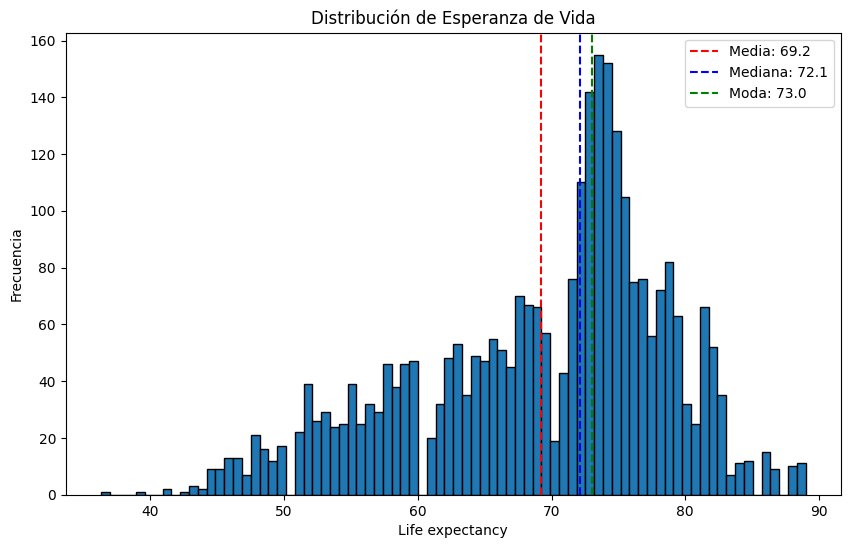

In [254]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(le_data["Life expectancy "], bins=80, edgecolor="black")
ax.set_xlabel("Life expectancy")
ax.set_ylabel("Frecuencia")
ax.set_title("Distribución de Esperanza de Vida")

ax.axvline(mean_le, color="red", linestyle="--", label=f"Media: {mean_le:.1f}")
ax.axvline(median_le, color="blue", linestyle="--", label=f"Mediana: {median_le:.1f}")
ax.axvline(mode_le, color="green", linestyle="--", label=f"Moda: {mode_le:.1f}")

ax.legend()

plt.show()


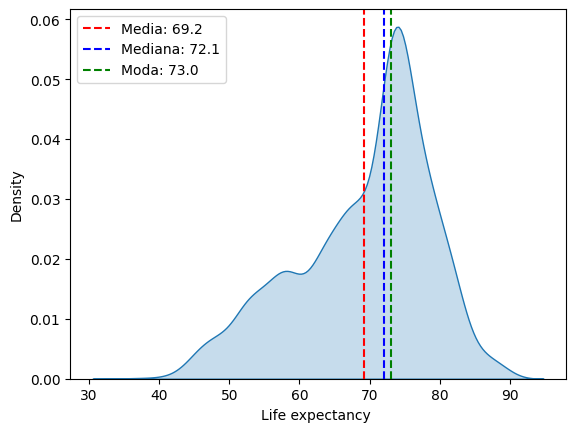

In [255]:
sns.kdeplot(le_data["Life expectancy "], fill=True)
plt.axvline(mean_le, color="red", linestyle="--", label=f"Media: {mean_le:.1f}")
plt.axvline(median_le, color="blue", linestyle="--", label=f"Mediana: {median_le:.1f}")
plt.axvline(mode_le, color="green", linestyle="--", label=f"Moda: {mode_le:.1f}")
plt.legend()
plt.show()

La distribución muestra un sesgo hacia la derecha, es decir la mayoría de los valores se concentran en números altos, mientras que una minoría se encuentra en números bajos.

Ahora analizaré el resto de las tablas, comenzando por la columna `Year`.

In [256]:
print(le_data["Year"].unique())

[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]


/tmp/ipython-input-2422082920.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


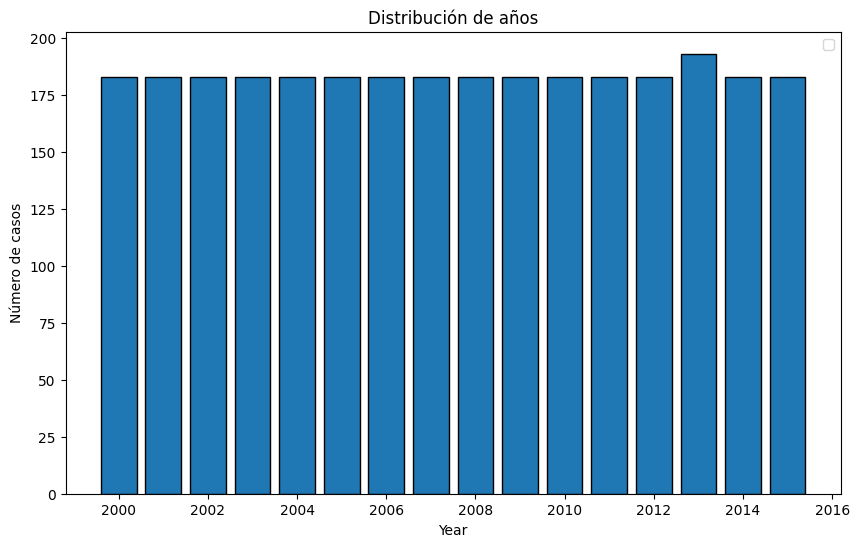

In [257]:
fig, ax = plt.subplots(figsize=(10,6))

year_counts = le_data["Year"].value_counts().sort_index()
ax.bar(year_counts.index, year_counts.values, edgecolor="black")

ax.set_xlabel("Year")
ax.set_ylabel("Número de casos")
ax.set_title("Distribución de años")

ax.legend()
plt.show()



En 2013 se que en ese año tuvo un pico de actividad o registros.

En general todos los años presentan un número de casos similar.

Los valores abarcan entre los años 2000 y 2015.

In [258]:
country_counts = le_data["Country"].value_counts()

country_table = pd.DataFrame({
    "Country": country_counts.index,
    "Number_Of_Cases": country_counts.values
})

country_table

,Country,Number_Of_Cases
0,Afghanistan,16
1,Albania,16
2,Algeria,16
3,Angola,16
4,Antigua and Barbuda,16
...,...,...
188,Monaco,1
189,Marshall Islands,1
190,Saint Kitts and Nevis,1
191,San Marino,1


In [259]:
country_table.loc[country_table["Number_Of_Cases"] < 16]

,Country,Number_Of_Cases
183,Dominica,1
184,Cook Islands,1
185,Palau,1
186,Niue,1
187,Nauru,1
188,Monaco,1
189,Marshall Islands,1
190,Saint Kitts and Nevis,1
191,San Marino,1
192,Tuvalu,1


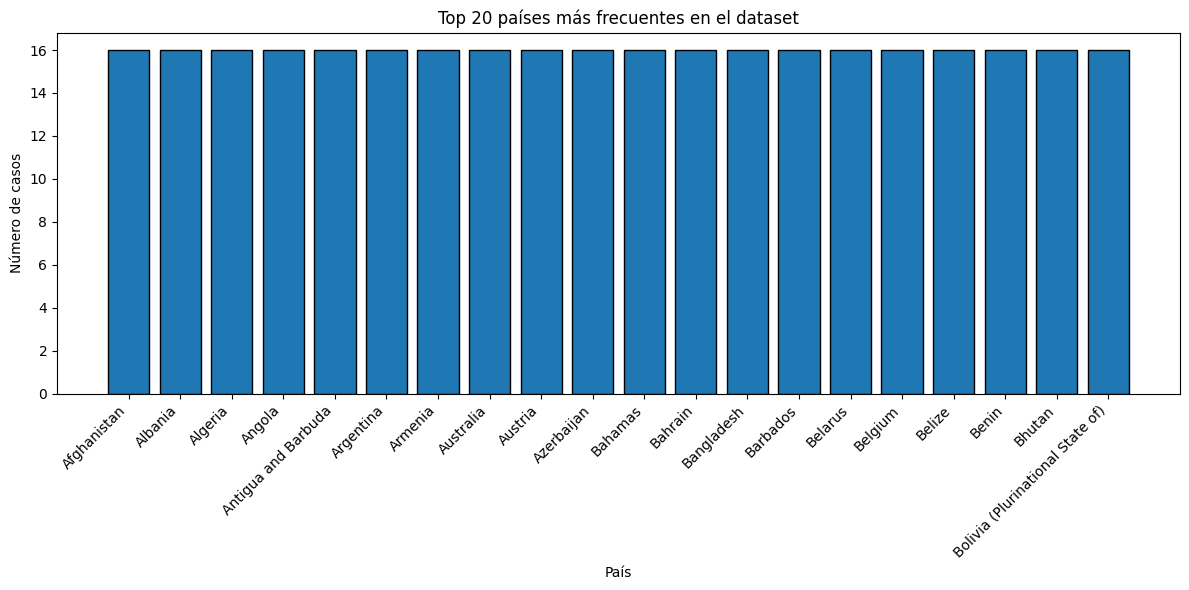

In [260]:
top_countries = le_data["Country"].value_counts().head(20)

plt.figure(figsize=(12,6))
plt.bar(top_countries.index, top_countries.values, edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.xlabel("País")
plt.ylabel("Número de casos")
plt.title("Top 20 países más frecuentes en el dataset")
plt.tight_layout()
plt.show()

In [261]:
print(le_data["Country"].unique())
print("\nHay en total:", le_data["Country"].nunique(), "paises")

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)'

Podemos observar que la mayoría de los países aparecen en los 16 años distintos, excepto 10 países que solo figuran una vez en todo el dataset, y que disponemos de 193 paises en total.


Ahora vamos a analizar la columna `Status`, la cual indica si un país está en desarrollo o desarrollado.

In [262]:
le_data["Status"].value_counts()

,count
Status,
Developing,2426
Developed,512


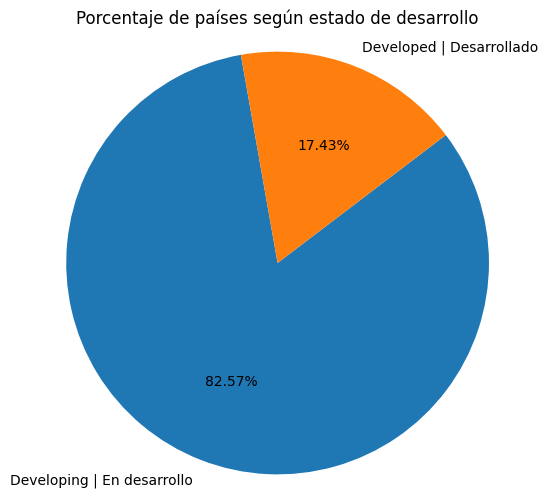

In [263]:
labels = ["Developing | En desarrollo", "Developed | Desarrollado"]
sizes = [
          le_data["Status"].value_counts()["Developing"],
          le_data["Status"].value_counts()["Developed"]
        ]

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=100)
ax.set_title("Porcentaje de países según estado de desarrollo")
ax.axis('equal')

plt.show()

Se observa que el porcentaje de países en desarrollo es mayor que el de países desarrollados.

Ahora vamos a analizar la columnas de mortalidad.

In [264]:
le_data["Adult Mortality"]

,Adult Mortality
0,263.0
1,271.0
2,268.0
3,272.0
4,275.0
...,...
2933,723.0
2934,715.0
2935,73.0
2936,686.0


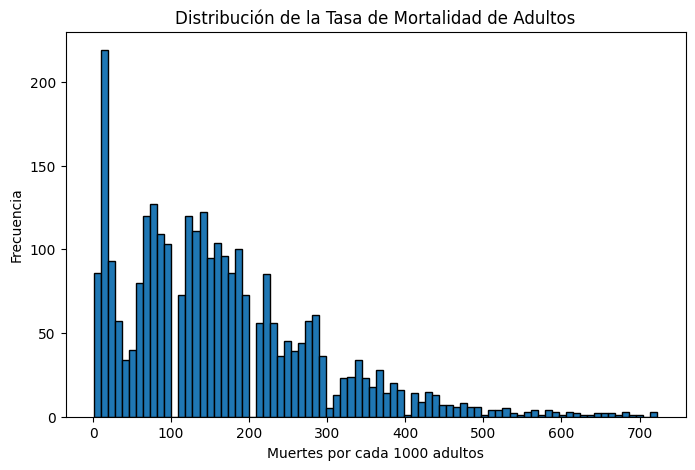

In [265]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(le_data["Adult Mortality"].dropna(), bins=80, edgecolor="black")

ax.set_title("Distribución de la Tasa de Mortalidad de Adultos")
ax.set_xlabel("Muertes por cada 1000 adultos")
ax.set_ylabel("Frecuencia")

plt.show()


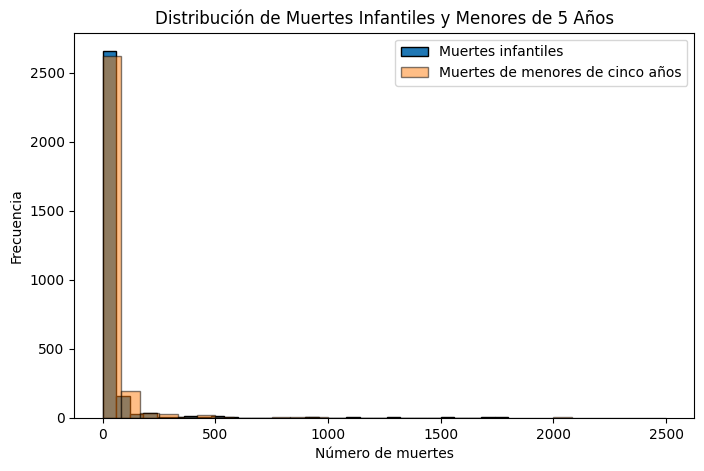

In [266]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(le_data["infant deaths"].dropna(), bins=30, label="Muertes infantiles", edgecolor="black")
ax.hist(le_data["under-five deaths "].dropna(), bins=30, alpha=0.5, label="Muertes de menores de cinco años", edgecolor="black")

ax.set_title("Distribución de Muertes Infantiles y Menores de 5 Años")
ax.set_xlabel("Número de muertes")
ax.set_ylabel("Frecuencia")
ax.legend()

plt.show()

Las dos gráficas muestran la distribución de muertes en distintos grupos de edad, una para muertes infantiles y de menores de cinco años, y otra para la tasa de mortalidad adulta.


En ambos casos se puede ver que la mayoría de los casos ocurre en números bajos, por lo que, en general, hay menos mortalidad.

Un dato que puede llegar a ser relevante es el consumo de alcohol.

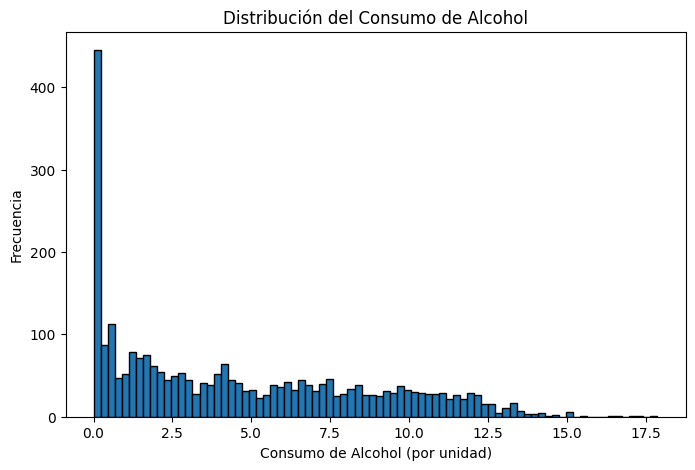

In [267]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(le_data["Alcohol"], bins=80, edgecolor="black")

ax.set_title("Distribución del Consumo de Alcohol")
ax.set_xlabel("Consumo de Alcohol (por unidad)")
ax.set_ylabel("Frecuencia")

plt.show()

En la mayoría de los países, el consumo de alcohol es bajo, pero hay países donde sí hay un consumo elevado.

El PIB (Producto Interno Bruto) es el valor total de todos los bienes y servicios producidos en un país durante un año. Este porcentaje indica cuánto del dinero total que produce un país se destina al sistema de salud.

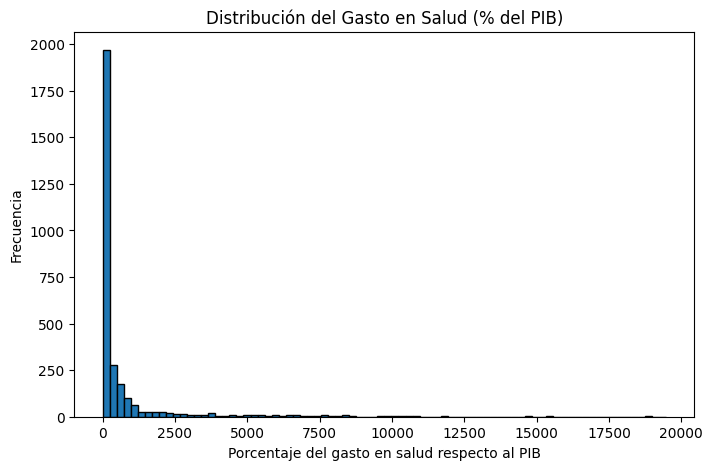

In [268]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(le_data["percentage expenditure"].dropna(), bins=80, edgecolor="black")

ax.set_title("Distribución del Gasto en Salud (% del PIB)")
ax.set_xlabel("Porcentaje del gasto en salud respecto al PIB")
ax.set_ylabel("Frecuencia")

plt.show()


La mayoría de los países tienen un **porcentaje bajo de gasto en salud** respecto a su **PIB**.

Hay una cola larga hacia la derecha, lo que indica que unos pocos países invierten mucho más en salud, lo cual tiene sentido tenemos menos paises desarrollados que en desarrollo.




Otro dato importante es la escolarización.

In [269]:
mean_schooling = le_data["Schooling"].mean()
median_schooling = le_data["Schooling"].median()
mode_schooling = le_data["Schooling"].mode()[0]


print("Media: ", mean_schooling)
print("Mediana: ", median_schooling)
print("Moda: ", mode_schooling)

Media:  11.992792792792793
Mediana:  12.3
Moda:  12.9


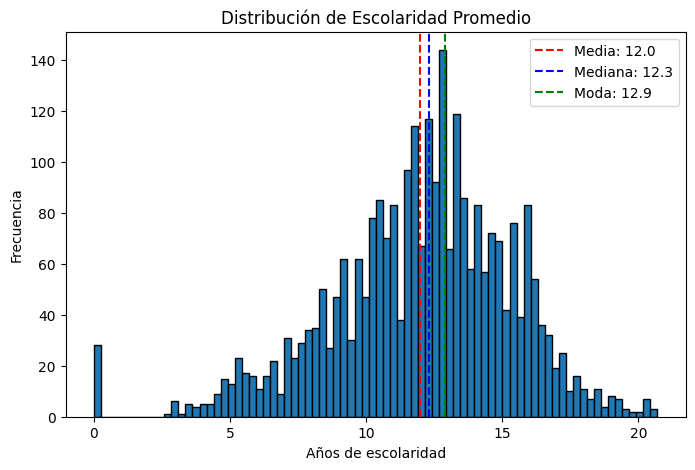

In [270]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(le_data["Schooling"].dropna(), bins=80, edgecolor="black")
ax.set_title("Distribución de Escolaridad Promedio")
ax.set_xlabel("Años de escolaridad")
ax.set_ylabel("Frecuencia")

ax.axvline(mean_schooling, color="red", linestyle="--", label=f"Media: {mean_schooling:.1f}")
ax.axvline(median_schooling, color="blue", linestyle="--", label=f"Mediana: {median_schooling:.1f}")
ax.axvline(mode_schooling, color="green", linestyle="--", label=f"Moda: {mode_schooling:.1f}")

ax.legend()
plt.show()


Vemos que en la mayoría de los países la escolarización ronda entre los 10 y 15 años teniendo una media de 12 años, pero en algunos es nula o muy baja.

Esta gráfica muestra que la población de los países es totalmente distinta.

Algunos tienen miles de millones de habitantes y otros solo unos miles. Además en porcentaje, hay menos países con pocos habitantes que con muchos.

Ahora vamos a analizar `Income composition of resources`

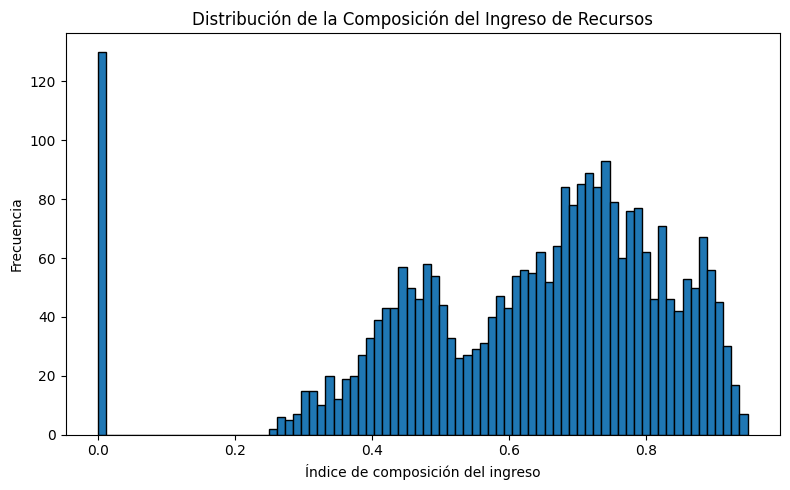

In [271]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(le_data["Income composition of resources"].dropna(), bins=80, edgecolor="black")

ax.set_title("Distribución de la Composición del Ingreso de Recursos")
ax.set_xlabel("Índice de composición del ingreso")
ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Hay un pico muy alto en el valor 0.0, lo que indica que tienen un acceso nulo o no registrado a recursos.

Esto podría deberse a datos faltantes o a países con condiciones muy desfavorables.

El resto de los datos se distribuyen entre 0.1 y 0.9, lo que sugiere que la mayoría de los países tienen un acceso moderado a alto a recursos.

Ahora analizaremos los datos que tenemos sobre el SIDA y el VIH.

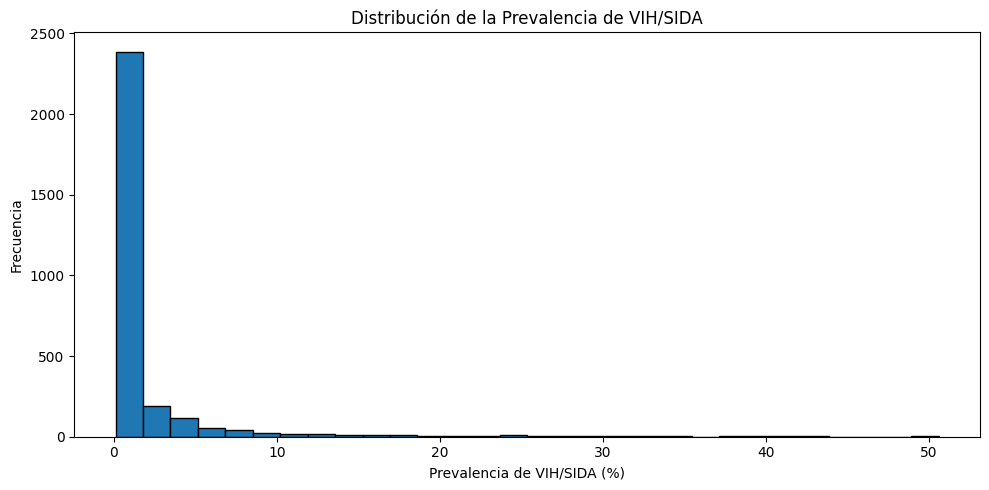

In [272]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(le_data[" HIV/AIDS"].dropna(), bins=30, edgecolor="black")

ax.set_title("Distribución de la Prevalencia de VIH/SIDA")
ax.set_xlabel("Prevalencia de VIH/SIDA (%)")
ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Se puede observar que en la mayoría de los países, el porcentaje de estas enfermedades es 0% y en otra mayoría es inferior al 10%, aunque en algunos casos minoritarios alcanza porcentajes mucho más altos.

Analicé las gráficas que me parecieron más importantes, y a continuación mostraré un breve resumen de las gráficas numéricas.

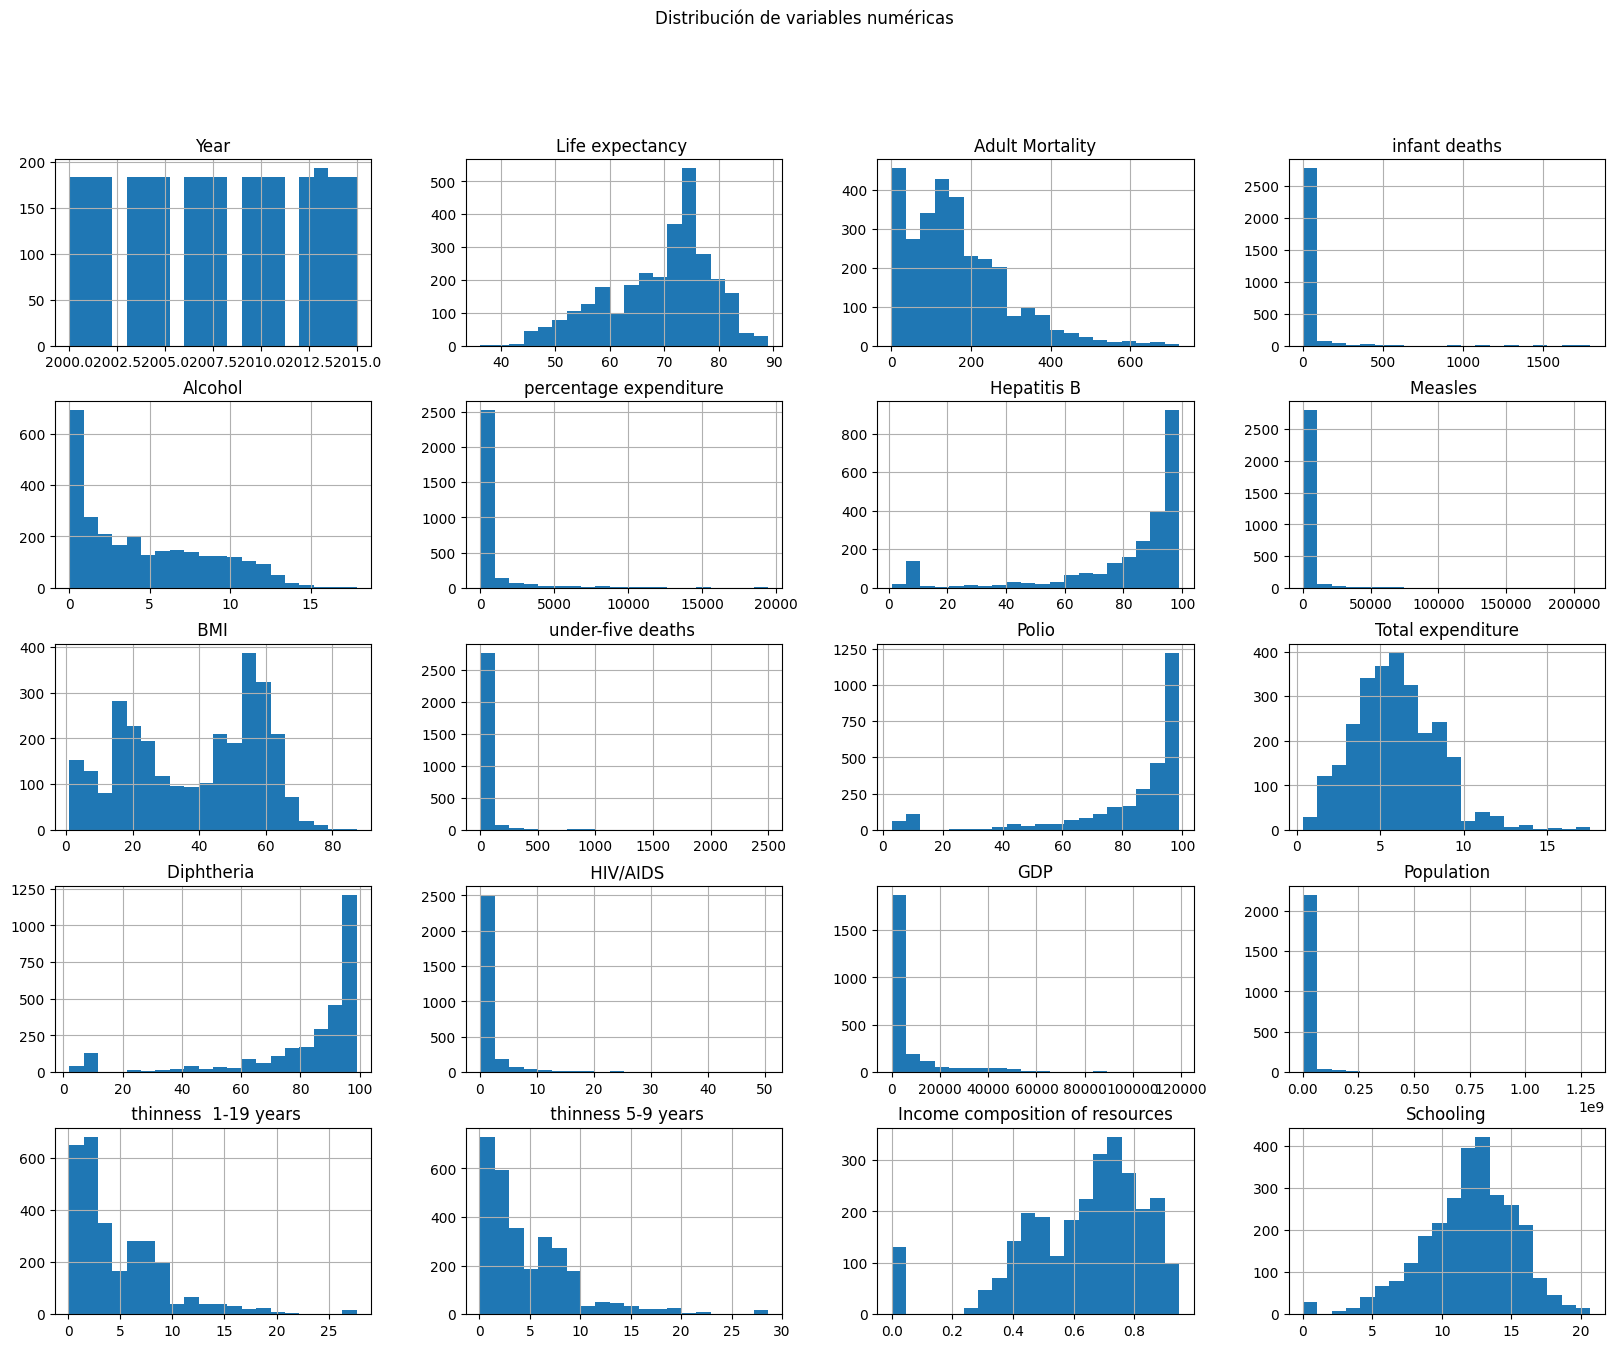

In [273]:
numeric_cols = le_data.select_dtypes(include=["float64", "int64"]).columns

le_data[numeric_cols].hist(bins=20, figsize=(20,15))
plt.suptitle("Distribución de variables numéricas")
plt.show()

### Matriz de correlación

La matriz de correlación es una tabla que muestra cómo se relacionan las variables numéricas entre sí.

* Valores cercanos a 1 → correlación positiva fuerte (cuando una sube, la otra también).
* Valores cercanos a -1 → correlación negativa fuerte (cuando una sube, la otra baja).
* Valores cercanos a 0 → poca o ninguna relación.

In [274]:
corr_matrix = le_data.corr(numeric_only=True)
corr_matrix

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


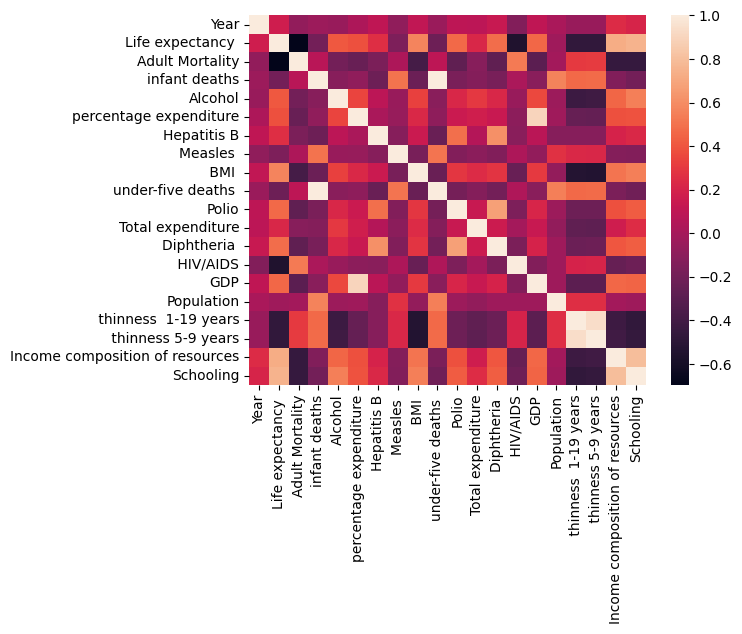

In [275]:
sns.heatmap(corr_matrix)
plt.show()

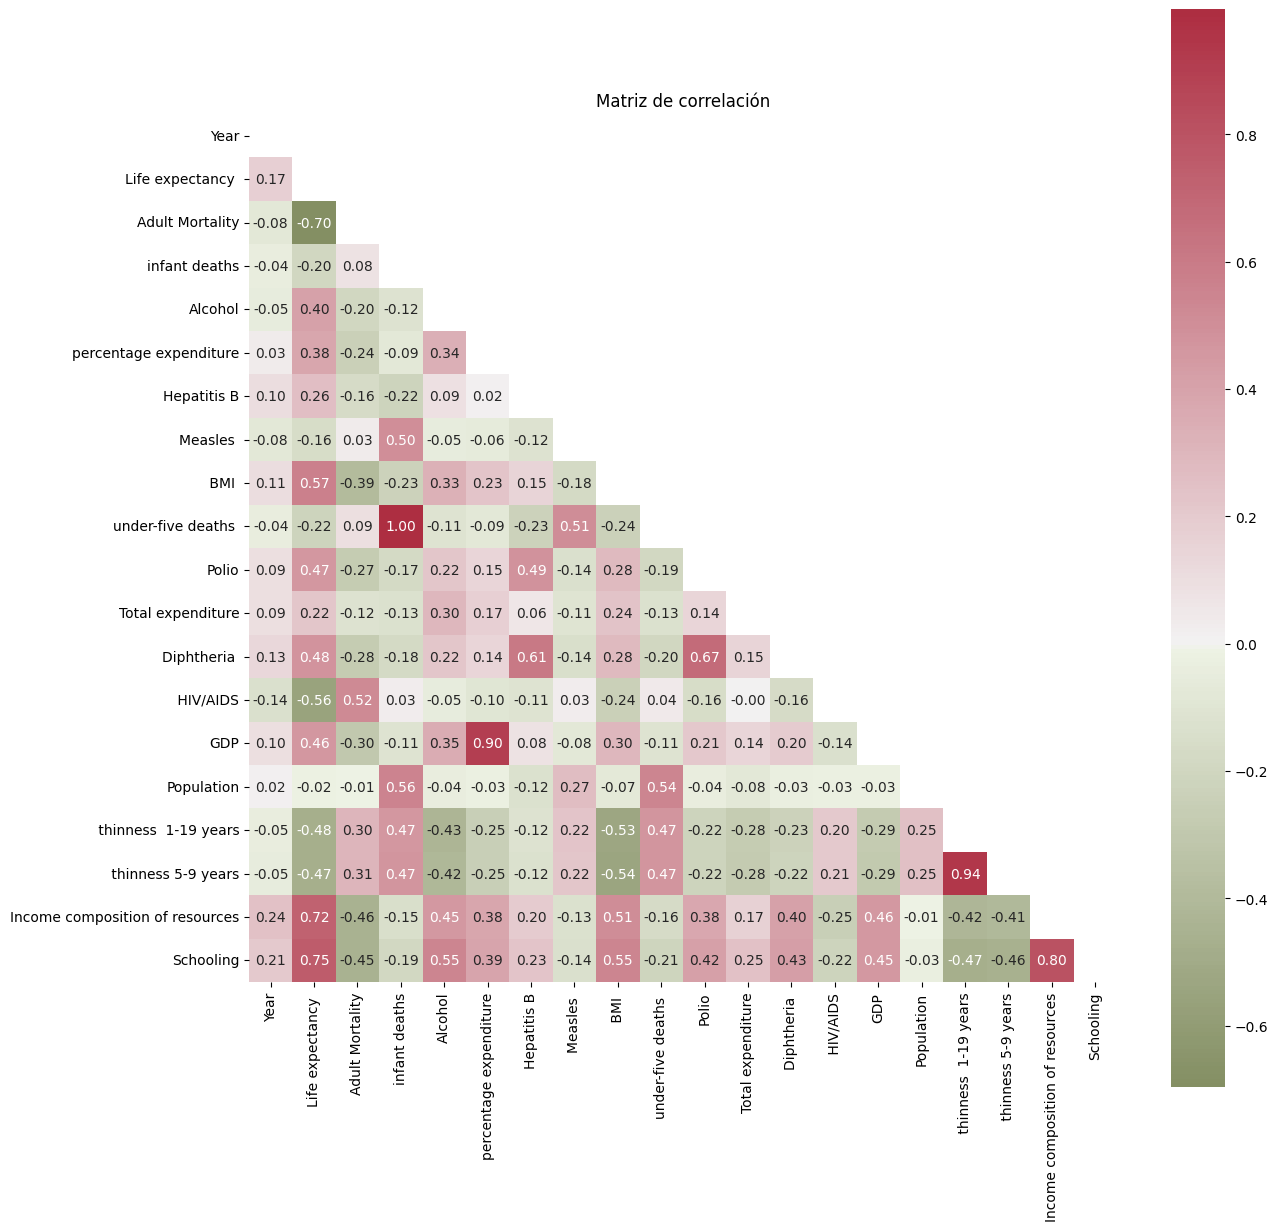

In [276]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(14, 14))
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.title("Matriz de correlación")
plt.show()


`Life expectancy` tiene:

* Correlación negativa fuerte con `Adult Mortality` (-0.69) → más muertes adultas, menor esperanza de vida.

* Correlación negativa con `HIV/AIDS` (-0.56) → mayor prevalencia de VIH/SIDA, menor esperanza de vida.

* Correlación positiva con `Schooling` (0.66) → más años de escolaridad, mayor esperanza de vida.

* Correlación positiva con `Income composition of resources` (0.72) → mejor acceso a recursos, mayor longevidad.

* `GDP` tiene correlaciones más débiles, pero tiende a relacionarse positivamente con escolaridad y gasto en salud.

* `Alcohol` tiene una correlación negativa leve con la esperanza de vida.


Por lo tanto, estas serán las variables numéricas que tendrán mayor efecto.

Otras variables aunque no sean numéricas, probablemente también tendrán un gran impacto, como el estatus del país (si es en desarrollo o desarrollado).

### Valores nulos

En este subapartado vamos a analizar cuántos valores nulos existen y en qué variables se encuentran, para poder realizar una limpieza de datos más efectiva.

In [277]:
print("-" * 61)
le_data.info()
print("-" * 61)
print(le_data.isna().sum())
print("-" * 61)
print(le_data.isnull().sum())
print("-" * 61)

-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths   

Algunas columnas presentan valores nulos, especialmente **Population (652)** y **Hepatitis B (553)**, mientras que otras como **Life expectancy** o **Adult Mortality** apenas tienen 10 valores faltantes.

El número de valores nulos es pequeño y se podría tratar mediante imputación o eliminando el registro correspondiente dependiendo el caso.

En el caso de nuestro target, lo más recomendable será eliminar esos registros.


| Columna | No nulos | Nulos |
|---------|----------|-------|
| Life expectancy | 2928 | 10 |
| Adult Mortality | 2928 | 10 |
| Alcohol | 2744 | 194 |
| Hepatitis B | 2385 | 553 |
| BMI | 2904 | 34 |
| Polio | 2919 | 19 |
| Total expenditure | 2712 | 226 |
| Diphtheria | 2919 | 19 |
| GDP | 2490 | 448 |
| Population | 2286 | 652 |
| thinness 1-19 years | 2904 | 34 |
| thinness 5-9 years | 2904 | 34 |
| Income composition of resources | 2771 | 167 |
| Schooling | 2775 | 163 |


## Exposición del objetivo

El objetivo principal de este proyecto de *Machine Learning* es **predecir la esperanza de vida de un país** a partir de diferentes variables relacionadas con la salud, la economía, la educación y la demografía.  

El **target** o variable a predecir es **Life expectancy**, expresada en años.

Para ello se emplearán como variables explicativas indicadores como la mortalidad adulta, muertes infantiles, prevalencia de VIH/SIDA, cobertura de vacunación, gasto en salud, PIB, composición del ingreso de recursos, escolaridad, el pais, entre otros.  

**El modelo deberá predecir con alta exactitud la esperanza de vida por país.**


## Preparación de los datos para los algoritmos de Machine Learning

En este apartado vamos a limpiar el dataset para dejarlo listo para el modelo que elijamos.

Primero, vamos a normalizar los nombres, colocándolos en un formato más estándar.

Como se puede observar, hay muchas columnas con espacios, nombres en minúsculas, mayúsculas, etc.

ransformaré todo al formato **snake_case**.

In [278]:
le_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [279]:
def format_columns(df):
  df.columns = df.columns.str.strip()
  df.columns = df.columns.str.lower()
  df.columns = df.columns.str.replace(" ", "_", regex=False)
  df.columns = df.columns.str.replace("-", "_", regex=False)
  df.columns = df.columns.str.replace("__", "_", regex=False)
  df.columns = df.columns.str.replace("/", "_", regex=False)

In [280]:
format_columns(le_data)
le_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio               

Ahora todos tienen el mismo formato, lo que además permite trabajar con ellos usando `[]` o `.` y el nombre de la columna.

Lo siguiente será trabajar con los valores nulos.
En el caso del target, eliminaremos esas filas.

In [281]:
print("Nulos de nuestro target: ", le_data["life_expectancy"].isnull().sum())
le_data = le_data.dropna(subset=["life_expectancy"])
print("Nulos de nuestro target: " , le_data["life_expectancy"].isnull().sum())

Nulos de nuestro target:  10
Nulos de nuestro target:  0


Ahora nos ocuparemos de nuestros valores numéricos.

Dado que no contamos con una gran cantidad de registros en nuestro dataframe, lo más recomendable será utilizar la media para no perder esos datos.

In [282]:
le_data.isna().sum()

,0
country,0
year,0
status,0
life_expectancy,0
adult_mortality,0
infant_deaths,0
alcohol,193
percentage_expenditure,0
hepatitis_b,553
measles,0


In [283]:
for c in le_data.select_dtypes(include=["float64", "int64"]).columns:
  le_data[c].fillna(le_data[c].mean(), inplace=True)

print("-" * 61)
le_data.info()
print("-" * 61, "\n")

-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2928 non-null   object 
 1   year                             2928 non-null   int64  
 2   status                           2928 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2928 non-null   int64  
 6   alcohol                          2928 non-null   float64
 7   percentage_expenditure           2928 non-null   float64
 8   hepatitis_b                      2928 non-null   float64
 9   measles                          2928 non-null   int64  
 10  bmi                              2928 non-null   float64
 11  under_five_deaths        

/tmp/ipython-input-3630230316.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  le_data[c].fillna(le_data[c].mean(), inplace=True)
/tmp/ipython-input-3630230316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_data[c].fillna(le_data[c].mean(), inplace=True)


Ahora tocaría convertir los valores que son cadenas `String` a `bool` o `int64`.

En nuestro caso, lo más recomendable es usar booleanos, ya que si se convierten los países a números, podrían confundir al modelo, al ser valores sin un significado real y probablemente en serie.

En el caso del `status`, lo que haré será asignar 0 cuando el país no sea desarrollado y 1 cuando sí lo sea, de modo que obtengamos un valor booleano sin tener el tipo `object`.

In [284]:
le_data["is_developed"] = 0

le_data["is_developed"].loc[le_data["status"] == "Developed"] = 1
le_data.drop(columns=["status"], inplace=True)

print("-" * 61)
le_data.info()
print("-" * 61)
le_data.loc[le_data["is_developed"] == 1, ["country", "is_developed"]]

-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2928 non-null   object 
 1   year                             2928 non-null   int64  
 2   life_expectancy                  2928 non-null   float64
 3   adult_mortality                  2928 non-null   float64
 4   infant_deaths                    2928 non-null   int64  
 5   alcohol                          2928 non-null   float64
 6   percentage_expenditure           2928 non-null   float64
 7   hepatitis_b                      2928 non-null   float64
 8   measles                          2928 non-null   int64  
 9   bmi                              2928 non-null   float64
 10  under_five_deaths                2928 non-null   int64  
 11  polio                    

/tmp/ipython-input-1204094725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_data["is_developed"] = 0
/tmp/ipython-input-1204094725.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single ste

,country,is_developed
112,Australia,1
113,Australia,1
114,Australia,1
115,Australia,1
116,Australia,1
...,...,...
2805,United States of America,1
2806,United States of America,1
2807,United States of America,1
2808,United States of America,1


La columna `status` ahora se ha convertido en la columna `is_developed`, que es `1` si el país es **desarrollado** y `0` si el país **está en desarrollo**.

Ahora estaría el caso de los países, que como mencione antes presentan el problema de que al convertirlos a números con una etiqueta el modelo podría confundirse, ya que serían valores numéricos que no representan nada realmente.

Además, tampoco sería comprensible para una persona interpretar esos números a menos que se conviertan de manera inversa.

Para esto utilizaré la librería scikit-learn:      [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

Tutotial interesante: [one-hot-encoding-python-tutorial](https://www.datacamp.com/es/tutorial/one-hot-encoding-python-tutorial)

In [285]:
encoder = OneHotEncoder(sparse_output=False)
                      # sparse_output=False → devuelve un array np

encoded = encoder.fit_transform(le_data[["country"]])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["country"]))

encoded_df = encoded_df.astype(int) # float64 a int64

encoded_df.index = le_data.index

le_data = pd.concat([le_data.drop(columns=["country"]), encoded_df], axis=1)

le_data.info(max_cols=200)
le_data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Columns: 204 entries, year to country_Zimbabwe
dtypes: float64(16), int64(188)
memory usage: 4.6 MB


,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,is_developed,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cabo Verde,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czechia,country_Côte d'Ivoire,country_Democratic People's Republic of Korea,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Grenada,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran (Islamic Republic of),country_Iraq,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kuwait,country_Kyrgyzstan,country_Lao People's Democratic Republic,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Mauritania,country_Mauritius,country_Mexico,country_Micronesia (Federated States of),country_Mongolia,country_Montenegro,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norway,country_Oman,country_Pakistan,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Republic of Korea,country_Republic of Moldova,country_Romania,country_Russian Federation,country_Rwanda,country_Saint Lucia,country_Saint Vincent and the Grenadines,country_Samoa,country_Sao Tome and Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [286]:
le_data.info(max_cols=204)

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 204 columns):
 #    Column                                                        Non-Null Count  Dtype  
---   ------                                                        --------------  -----  
 0    year                                                          2928 non-null   int64  
 1    life_expectancy                                               2928 non-null   float64
 2    adult_mortality                                               2928 non-null   float64
 3    infant_deaths                                                 2928 non-null   int64  
 4    alcohol                                                       2928 non-null   float64
 5    percentage_expenditure                                        2928 non-null   float64
 6    hepatitis_b                                                   2928 non-null   float64
 7    measles                                                       2

In [287]:
le_data

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,is_developed,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cabo Verde,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czechia,country_Côte d'Ivoire,country_Democratic People's Republic of Korea,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Grenada,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran (Islamic Republic of),country_Iraq,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kuwait,country_Kyrgyzstan,country_Lao People's Democratic Republic,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Mauritania,country_Mauritius,country_Mexico,country_Micronesia (Federated States of),country_Mongolia,country_Montenegro,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norway,country_Oman,country_Pakistan,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Republic of Korea,country_Republic of Moldova,country_Romania,country_Russian Federation,country_Rwanda,country_Saint Lucia,country_Saint Vincent and the Grenadines,country_Samoa,country_Sao Tome and Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

El método creó tantas columnas como países únicos había. Pero volvemos a tener el problema del formato de las columnas, por lo que volveremos a aplicar la función de normalización.

In [288]:
format_columns(le_data)
le_data.info(max_cols=204)

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 204 columns):
 #    Column                                                        Non-Null Count  Dtype  
---   ------                                                        --------------  -----  
 0    year                                                          2928 non-null   int64  
 1    life_expectancy                                               2928 non-null   float64
 2    adult_mortality                                               2928 non-null   float64
 3    infant_deaths                                                 2928 non-null   int64  
 4    alcohol                                                       2928 non-null   float64
 5    percentage_expenditure                                        2928 non-null   float64
 6    hepatitis_b                                                   2928 non-null   float64
 7    measles                                                       2

Siguen habiendo nombres extraños, por lo que aplicaremos otro filtro adicional.

In [289]:
le_data.columns = le_data.columns.str.replace("[^A-Za-z0-9_]", "", regex=True).str.lower()

In [290]:
le_data.info(max_cols=204)

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 204 columns):
 #    Column                                                        Non-Null Count  Dtype  
---   ------                                                        --------------  -----  
 0    year                                                          2928 non-null   int64  
 1    life_expectancy                                               2928 non-null   float64
 2    adult_mortality                                               2928 non-null   float64
 3    infant_deaths                                                 2928 non-null   int64  
 4    alcohol                                                       2928 non-null   float64
 5    percentage_expenditure                                        2928 non-null   float64
 6    hepatitis_b                                                   2928 non-null   float64
 7    measles                                                       2

**Ya tendríamos el dataset listo para trabajar con los modelos.**



El dataset cuenta con **204 columnas** y **2928 filas**, de las cuales:

| Categoría | Columnas | Tipo de dato | Descripción |
| :----- | :----- | :----- | :----- |
| Información general del país | year | int64 | Año de la observación. |
| Información general del país | is_developed | int64 | Variable binaria que indica si el país está desarrollado (1) o en desarrollo (0). |
| Esperanza de vida | life_expectancy | float64 | Esperanza de vida promedio al nacer en años. |
| Mortalidad | adult_mortality | float64 | Tasa de mortalidad de adultos. |
| Mortalidad | infant_deaths | int64 | Número de muertes infantiles. |
| Mortalidad | under_five_deaths | int64 | Número de muertes de niños menores de 5 años. |
| Consumo de sustancias | alcohol | float64 | Consumo de alcohol per cápita. |
| Gasto en salud | percentage_expenditure | float64 | Porcentaje del gasto en salud respecto al PIB. |
| Inmunización | hepatitis_b | float64 | Porcentaje de cobertura de vacunación contra Hepatitis B. |
| Inmunización | measles | int64 | Número de casos de sarampión. |
| Factores de salud | bmi | float64 | Índice de masa corporal promedio. |
| Inmunización | polio | float64 | Porcentaje de cobertura de vacunación contra Polio. |
| Gasto en salud | total_expenditure | float64 | Gasto total en salud per cápita. |
| Inmunización | diphtheria | float64 | Porcentaje de cobertura de vacunación contra Difteria. |
| Enfermedades | hiv_aids | float64 | Prevalencia de VIH/SIDA. |
| Economía | gdp | float64 | Producto Interno Bruto per cápita. |
| Demografía | population | float64 | Población total del país. |
| Nutrición | thinness_1_19_years | float64 | Porcentaje de delgadez en niños de 1 a 19 años. |
| Nutrición | thinness_5_9_years | float64 | Porcentaje de delgadez en niños de 5 a 9 años. |
| Economía | income_composition_of_resources | float64 | Composición del ingreso de los recursos del país. |
| Educación | schooling | float64 | Años promedio de escolaridad. |
| Información general del país | country_spain, country_italy, …, | int64 | Variables binarias (0/1) que indican a cada país. |


Ahora lo guardaremos y lo descargaremos en caso de que estemos trabajando en **Google Colab**.

In [291]:
le_data.to_csv("life_expectancy_data.csv", index=False, encoding='utf-8')

> Solo Google Colab

In [292]:
# from google.colab import files

# files.download('life_expectancy_data.csv')

### Particiones para entrenamiento y prueba

En este subapartado se dividirá el dataset en $X$ y $y$, y posteriormente en sus dos subconjuntos de entrenamiento y prueba.

Y en sus dos sub divisiones para entrenamiento y pruebas.

* $X$: Conjunto de datos que utilizaremos como características para realizar la predicción.

* $y$: Nuestra variable objetivo (target), en este caso `life_expectancy`.

In [293]:
X = le_data.drop(columns=["life_expectancy"])
y = le_data["life_expectancy"]

Separamos el dataset en dos partes:

* Datos de entranamiento (training set): 80%
* Datos de prueba (test set): 20% (si tenemos muchos datos, el porcentaje seria menor)

Además, utilizaré `random_state = 42` para que en todos los entrenamientos y momentos los conjuntos de entrenamiento y prueba sean siempre los mismos.

Elegí este número porque es el que se usa comúnmente en la comunidad de machine learning.

Para esto utilizaré la librería scikit-learn: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [295]:
X_train

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,is_developed,country_afghanistan,country_albania,country_algeria,country_angola,country_antigua_and_barbuda,country_argentina,country_armenia,country_australia,country_austria,country_azerbaijan,country_bahamas,country_bahrain,country_bangladesh,country_barbados,country_belarus,country_belgium,country_belize,country_benin,country_bhutan,country_bolivia_plurinational_state_of,country_bosnia_and_herzegovina,country_botswana,country_brazil,country_brunei_darussalam,country_bulgaria,country_burkina_faso,country_burundi,country_cabo_verde,country_cambodia,country_cameroon,country_canada,country_central_african_republic,country_chad,country_chile,country_china,country_colombia,country_comoros,country_congo,country_costa_rica,country_croatia,country_cuba,country_cyprus,country_czechia,country_cte_divoire,country_democratic_peoples_republic_of_korea,country_democratic_republic_of_the_congo,country_denmark,country_djibouti,country_dominican_republic,country_ecuador,country_egypt,country_el_salvador,country_equatorial_guinea,country_eritrea,country_estonia,country_ethiopia,country_fiji,country_finland,country_france,country_gabon,country_gambia,country_georgia,country_germany,country_ghana,country_greece,country_grenada,country_guatemala,country_guinea,country_guinea_bissau,country_guyana,country_haiti,country_honduras,country_hungary,country_iceland,country_india,country_indonesia,country_iran_islamic_republic_of,country_iraq,country_ireland,country_israel,country_italy,country_jamaica,country_japan,country_jordan,country_kazakhstan,country_kenya,country_kiribati,country_kuwait,country_kyrgyzstan,country_lao_peoples_democratic_republic,country_latvia,country_lebanon,country_lesotho,country_liberia,country_libya,country_lithuania,country_luxembourg,country_madagascar,country_malawi,country_malaysia,country_maldives,country_mali,country_malta,country_mauritania,country_mauritius,country_mexico,country_micronesia_federated_states_of,country_mongolia,country_montenegro,country_morocco,country_mozambique,country_myanmar,country_namibia,country_nepal,country_netherlands,country_new_zealand,country_nicaragua,country_niger,country_nigeria,country_norway,country_oman,country_pakistan,country_panama,country_papua_new_guinea,country_paraguay,country_peru,country_philippines,country_poland,country_portugal,country_qatar,country_republic_of_korea,country_republic_of_moldova,country_romania,country_russian_federation,country_rwanda,country_saint_lucia,country_saint_vincent_and_the_grenadines,country_samoa,country_sao_tome_and_principe,country_saudi_arabia,country_senegal,country_serbia,country_seychelles,country_sierra_leone,country_singapore,country_slovakia,country_slovenia,country_solomon_islands,country_somalia,country_south_africa,country_south_sudan,country_spain,country_sri_lanka,country_sudan,country_suriname,country_swaziland,country_sweden,country_switzerland,country_syrian_arab_republic,country_tajikistan,country_thailand,country_the_former_yugoslav_republic_of_macedonia,country_timor_leste,country_togo,country_tonga,country_trinidad_and_tobago,country_tunisia,country_turkey,country_turkmenistan,country_uganda,country_ukraine,country_united_arab_emirates,country_united_kingdom_of_great_britain_and_northern_ireland,country_united_republic_of_tanzania,country_united_states_of_america,country_uruguay,country_uzbekistan,country_vanuatu,country_venezuela_bolivarian_republic_of,country_viet_nam,country_yemen,country_zambia,country_zimbabwe
2268,2012,126.0,1,9.380000,742.510971,97.000000,0,58.3,1,93.0,9.890000,91.0,0.1,5659.382400,7.199770e+05,2.1,2.1,0.767000,14.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [296]:
y_train

,life_expectancy
2268,74.9
1680,71.5
2785,56.2
2512,81.1
1090,58.9
...,...
1640,82.0
1097,55.6
1132,65.0
1296,79.8


In [297]:
X_test

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,is_developed,country_afghanistan,country_albania,country_algeria,country_angola,country_antigua_and_barbuda,country_argentina,country_armenia,country_australia,country_austria,country_azerbaijan,country_bahamas,country_bahrain,country_bangladesh,country_barbados,country_belarus,country_belgium,country_belize,country_benin,country_bhutan,country_bolivia_plurinational_state_of,country_bosnia_and_herzegovina,country_botswana,country_brazil,country_brunei_darussalam,country_bulgaria,country_burkina_faso,country_burundi,country_cabo_verde,country_cambodia,country_cameroon,country_canada,country_central_african_republic,country_chad,country_chile,country_china,country_colombia,country_comoros,country_congo,country_costa_rica,country_croatia,country_cuba,country_cyprus,country_czechia,country_cte_divoire,country_democratic_peoples_republic_of_korea,country_democratic_republic_of_the_congo,country_denmark,country_djibouti,country_dominican_republic,country_ecuador,country_egypt,country_el_salvador,country_equatorial_guinea,country_eritrea,country_estonia,country_ethiopia,country_fiji,country_finland,country_france,country_gabon,country_gambia,country_georgia,country_germany,country_ghana,country_greece,country_grenada,country_guatemala,country_guinea,country_guinea_bissau,country_guyana,country_haiti,country_honduras,country_hungary,country_iceland,country_india,country_indonesia,country_iran_islamic_republic_of,country_iraq,country_ireland,country_israel,country_italy,country_jamaica,country_japan,country_jordan,country_kazakhstan,country_kenya,country_kiribati,country_kuwait,country_kyrgyzstan,country_lao_peoples_democratic_republic,country_latvia,country_lebanon,country_lesotho,country_liberia,country_libya,country_lithuania,country_luxembourg,country_madagascar,country_malawi,country_malaysia,country_maldives,country_mali,country_malta,country_mauritania,country_mauritius,country_mexico,country_micronesia_federated_states_of,country_mongolia,country_montenegro,country_morocco,country_mozambique,country_myanmar,country_namibia,country_nepal,country_netherlands,country_new_zealand,country_nicaragua,country_niger,country_nigeria,country_norway,country_oman,country_pakistan,country_panama,country_papua_new_guinea,country_paraguay,country_peru,country_philippines,country_poland,country_portugal,country_qatar,country_republic_of_korea,country_republic_of_moldova,country_romania,country_russian_federation,country_rwanda,country_saint_lucia,country_saint_vincent_and_the_grenadines,country_samoa,country_sao_tome_and_principe,country_saudi_arabia,country_senegal,country_serbia,country_seychelles,country_sierra_leone,country_singapore,country_slovakia,country_slovenia,country_solomon_islands,country_somalia,country_south_africa,country_south_sudan,country_spain,country_sri_lanka,country_sudan,country_suriname,country_swaziland,country_sweden,country_switzerland,country_syrian_arab_republic,country_tajikistan,country_thailand,country_the_former_yugoslav_republic_of_macedonia,country_timor_leste,country_togo,country_tonga,country_trinidad_and_tobago,country_tunisia,country_turkey,country_turkmenistan,country_uganda,country_ukraine,country_united_arab_emirates,country_united_kingdom_of_great_britain_and_northern_ireland,country_united_republic_of_tanzania,country_united_states_of_america,country_uruguay,country_uzbekistan,country_vanuatu,country_venezuela_bolivarian_republic_of,country_viet_nam,country_yemen,country_zambia,country_zimbabwe
2399,2009,449.0,46,7.60,782.598714,74.000000,5857,46.4,70,75.0,8.39,76.0,19.0,5888.628400,5.255813e+06,8.1,9.8,0.622,12.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [298]:
y_test

,life_expectancy
2399,56.5
196,73.0
2316,82.5
1735,75.6
1102,53.0
...,...
2452,69.1
381,74.8
1784,65.6
964,66.0


Podemos observar que nuestro target tanto en entrenamiento como en prueba, muestra una distribución similar por lo que no habrá problemas.

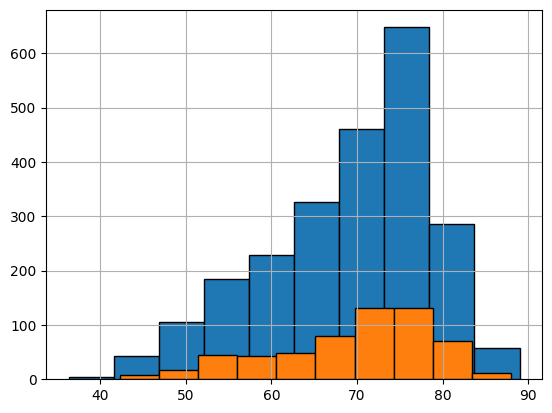

In [299]:
y_train.hist(edgecolor="black")
y_test.hist(edgecolor="black")
plt.show()

Además en ambos conjuntos se incluyen todos los años existentes.

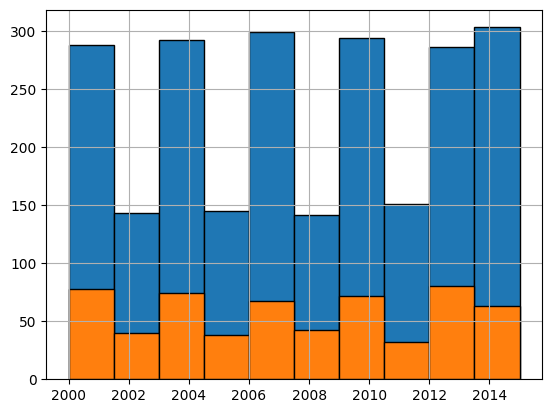

In [300]:
X_train["year"].hist(edgecolor="black")
X_test["year"].hist(edgecolor="black")
plt.show()

## Entrenamiento del modelo y comprobación del rendimiento

En este apartado se entrenarán varios modelos, comprobando en cada caso el rendimiento que ofrecen mediante las apropiadas medidas de error y/o acierto.

Vamos a probar varios modelos supervisados de regresion para determinar cuál nos da el mejor resultado.

* LinearRegression
* Ridge Regression
* Lasso Regression
* DecisionTreeRegressor
* RandomForestRegressor


Para evaluar los modelos, utilizaré la siguiente función, la cual incluye:

* R² → Indica qué tan bien el modelo explica la variabilidad de los datos.

Coeficiente de determinación:

$$
R^2 = 1 - \frac{\sum_{i=1}^m (y^{(i)} - \hat{y}^{(i)})^2}{\sum_{i=1}^m (y^{(i)} - \bar{y})^2}
$$

* RMSE → Error promedio en años.

Raiz del error cuadratico medio:

$$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^m(h(x^{(i)})-y^{(i)})^2}$$

* MAPE → Error relativo en porcentaje (%).

Error porcentual absoluto medio:

$$
MAPE = \frac{100}{m}\sum_{i=1}^m \left|\frac{y^{(i)} - \hat{y}^{(i)}}{y^{(i)}}\right|
$$


In [301]:
def test(y_test, y_pred):
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mape = mean_absolute_percentage_error(y_test, y_pred) * 100
  print(f"R² = {r2:.3f}")
  print(f"RMSE = {rmse:.3f}")
  print(f"MAPE = {mape:.2f}%")

### LinearRegression

Es el algoritmo más básico de regresión supervisada. Busca modelar la relación entre una variable dependiente $y$ y una o varias variables independientes $X$.

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
$$

Para esto utilizaré la librería scikit-learn: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)



In [302]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print(f"Linear Regression:")
test(y_test, y_pred)

Linear Regression:
R² = 0.955
RMSE = 1.967
MAPE = 1.83%


In [303]:
# Guarda el modelo
# dump(lr_model, "lr_model.joblib")
# Carga el modelo
# lr_model = load("lr_model.joblib")

# y_pred = lr_model.predict(X_test)
# test(y_test, y_pred)

# Solo Google Colab
# from google.colab import files
# files.download('lr_model.joblib')

### Ridge Regression

Es un algoritmo de regresión supervisada que extiende la regresión lineal clásica añadiendo una penalizacion **L2**. Penaliza los coeficientes grandes para evitar el sobreajuste.

$$
J(\beta) = \sum_{i=1}^m (y^{(i)} - \hat{y}^{(i)})^2 + \alpha \sum_{j=1}^n \beta_j^2
$$

Si $\alpha = 0 $ es una regresión lineal normal

Para esto utilizaré la librería scikit-learn: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)




In [304]:
alpha = 0.1
ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

print(f"Ridge: alpha = 0.1")
test(y_test, y_pred)

Ridge: alpha = 0.1
R² = 0.955
RMSE = 1.963
MAPE = 1.84%


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.80398e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


In [305]:
alpha = 1
ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

print(f"Ridge: alpha = 1")
test(y_test, y_pred)

Ridge: alpha = 1
R² = 0.948
RMSE = 2.120
MAPE = 2.12%


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.44395e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


In [306]:
alpha = 10
ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

print(f"Ridge: alpha = 10")
test(y_test, y_pred)

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.22844e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Ridge: alpha = 10
R² = 0.906
RMSE = 2.854
MAPE = 3.19%


### Lasso Regression

Igual al anterior pero cambiando como aplica el castigo.

$$
J(\beta) = \sum_{i=1}^m (y^{(i)} - \hat{y}^{(i)})^2 + \alpha \sum_{j=1}^n |\beta_j|
$$

Para esto utilizaré la librería scikit-learn: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [307]:
alpha = 0.1
lasso_model = Lasso(alpha=alpha)

lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

print(f"Lasso: alpha = 0.1")
test(y_test, y_pred)

Lasso: alpha = 0.1
R² = 0.812
RMSE = 4.032
MAPE = 4.59%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.012e+04, tolerance: 2.147e+01
  model = cd_fast.enet_coordinate_descent(


In [308]:
alpha = 1
lasso_model = Lasso(alpha=alpha)

lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

print(f"Lasso: alpha = 1")
test(y_test, y_pred)

Lasso: alpha = 1
R² = 0.807
RMSE = 4.084
MAPE = 4.63%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.991e+04, tolerance: 2.147e+01
  model = cd_fast.enet_coordinate_descent(


In [309]:
alpha = 10
lasso_model = Lasso(alpha=alpha)

lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

print(f"Lasso: alpha = 10")
test(y_test, y_pred)

Lasso: alpha = 10
R² = 0.680
RMSE = 5.263
MAPE = 5.73%


### DecisionTreeRegressor

El **DecisionTreeRegressor** es un algoritmo de regresión supervisada basado en **árboles de decisión**.

Para esto utilizaré la librería scikit-learn: [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)



In [310]:
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

print(f"DecisionTreeRegressor")
test(y_test, y_pred)

DecisionTreeRegressor
R² = 0.929
RMSE = 2.480
MAPE = 2.22%


Probé varias configuraciones pero esta fue la que mejor funcionó para este modelo.

La guardé por si acaso ya que los valores que produce suelen ser muy variables.

In [311]:
tree_model = DecisionTreeRegressor(min_samples_leaf = 2, min_samples_split = 10)

tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

print(f"DecisionTreeRegressor")
test(y_test, y_pred)

DecisionTreeRegressor
R² = 0.929
RMSE = 2.477
MAPE = 2.38%


In [312]:
# Guarda el modelo
# dump(tree_model, "tree_model.joblib")
# Carga el modelo
# tree_model = load("tree_model.joblib")

# y_pred = tree_model.predict(X_test)
# test(y_test, y_pred)

# Solo Google Colab
# from google.colab import files
# files.download('tree_model.joblib')

### RandomForestRegressor

Es un algoritmo de regresión supervisada basado en **múltiples árboles de decisión**.  

Para esto utilizaré la librería scikit-learn: [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


In [313]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("RandomForestRegressor: ")
test(y_test, y_pred)

RandomForestRegressor: 
R² = 0.967
RMSE = 1.678
MAPE = 1.55%


In [314]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth=None)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("RandomForestRegressor: ")
test(y_test, y_pred)

RandomForestRegressor: 
R² = 0.969
RMSE = 1.637
MAPE = 1.52%


In [315]:
rf_model = RandomForestRegressor(n_estimators=500, max_depth=None)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("RandomForestRegressor: ")
test(y_test, y_pred)

RandomForestRegressor: 
R² = 0.969
RMSE = 1.636
MAPE = 1.52%


In [316]:
# Guarda el modelo
# dump(rf_model, "rf_model.joblib")
# Carga el modelo
# rf_model = load("rf_model.joblib")

# y_pred = rf_model.predict(X_test)
# test(y_test, y_pred)

# Solo Google Colab
# from google.colab import files
# files.download('rf_model.joblib')

In [317]:
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=None)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("RandomForestRegressor: ")
test(y_test, y_pred)

RandomForestRegressor: 
R² = 0.968
RMSE = 1.651
MAPE = 1.54%




| n_estimators | R²   | RMSE  | MAPE  |
|--------------|------|-------|-------|
| 100          | 0.968 | 1.659 | 1.57% |
| 300          | 0.968 | 1.655 | 1.54% |
| 500          | 0.968 | 1.653 | 1.54% |
| 1000         | 0.969 | 1.649 | 1.54% |

El **RandomForestRegressor** fue el modelo que mejores resultados dio, junto con el **DecisionTreeRegressor** y el **LinearRegression**.

Probando con 300 árboles el Random Forest alcanzó un punto obtimo, y con 1000 árboles se refinó un poco más.

Pero elegiré como modelo el `RandomForestRegressor` con `n_estimators = 500`, ya que este es el punto intermedio y no supera por poco el peso máximo de archivo que se puede subir a GitHub.

### Carga de modelos

In [318]:
def load_from_github(url):
    response = requests.get(url)
    response.raise_for_status()
    return load(io.BytesIO(response.content))

url_rf_final = "https://raw.githubusercontent.com/Alejandro-BR/Life-Expectancy-Predict-ML/main/models/rf_model.joblib"
url_lr = "https://raw.githubusercontent.com/Alejandro-BR/Life-Expectancy-Predict-ML/main/models/testing/lr_model.joblib"
url_rf_test = "https://raw.githubusercontent.com/Alejandro-BR/Life-Expectancy-Predict-ML/main/models/testing/rf_model.joblib"
url_tree = "https://raw.githubusercontent.com/Alejandro-BR/Life-Expectancy-Predict-ML/main/models/testing/tree_model.joblib"

rf_model_final = load_from_github(url_rf_final)
lr_model = load_from_github(url_lr)
rf_model_test = load_from_github(url_rf_test)
tree_model = load_from_github(url_tree)


## Conclusiones

Después de analizar y limpiar los datos, y de probar diferentes modelos, elegí el **RandomForestRegressor**. Es un modelo que, aparentemente, funciona muy bien en nuestro dataset con los datos actuales pero se generó algo de overfitting.

Aunque muchos de los modelos que hemos visto durante las pruebas podrían haber servido para predecir, ya que funcionaban muy bien en este dataset, con unos cuantos cambios a los modelos no les cuesta predecirlo.

Tanto los modelos como el dataset están disponibles en el repositorio de GitHub de este proyecto para mayor comodidad y para facilitar el trabajo en local, aunque en Google Colab va un poco más lento cargarlos.

Si te gustó el proyecto, dale una estrella en GitHub ⭐.

In [320]:
y_pred = rf_model.predict(X_test)

print("RandomForestRegressor: ")
test(y_test, y_pred)

RandomForestRegressor: 
R² = 0.968
RMSE = 1.651
MAPE = 1.54%
